In [ ]:
#IMPORT LIBRARIES

# import 'Pandas' 
import pandas as pd 

# import 'Numpy' 
import numpy as np

# import subpackage of Matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# import 'Seaborn' 
import seaborn as sns

# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# display all columns of the dataframe
pd.options.display.max_columns = None

# display all rows of the dataframe
pd.options.display.max_rows = None
 
# to display the float values upto 6 decimal places     
pd.options.display.float_format = '{:.6f}'.format

# import train-test split 
from sklearn.model_selection import train_test_split

# import various functions from statsmodels
import statsmodels
import statsmodels.api as sm

# import StandardScaler to perform scaling
from sklearn.preprocessing import StandardScaler 

# import various functions from sklearn 
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score

# import function to perform feature selection
from sklearn.feature_selection import RFE

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.preprocessing import LabelEncoder

In [ ]:
# load the data
df  =pd.read_csv("german_credit.csv", sep=";")
df.head()

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,present_residence,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,no checking account,18,all credits at this bank paid back duly,car (used),1049,unknown/no savings account,< 1 yr,< 20,female : non-single or male : single,none,>= 7 yrs,car or other,21,none,for free,1,skilled employee/official,0 to 2,no,no,good
1,no checking account,9,all credits at this bank paid back duly,others,2799,unknown/no savings account,1 <= ... < 4 yrs,25 <= ... < 35,male : married/widowed,none,1 <= ... < 4 yrs,unknown / no property,36,none,for free,03-Feb,skilled employee/official,3 or more,no,no,good
2,... < 0 DM,12,no credits taken/all credits paid back duly,retraining,841,... < 100 DM,4 <= ... < 7 yrs,25 <= ... < 35,female : non-single or male : single,none,>= 7 yrs,unknown / no property,23,none,for free,1,unskilled - resident,0 to 2,no,no,good
3,no checking account,12,all credits at this bank paid back duly,others,2122,unknown/no savings account,1 <= ... < 4 yrs,20 <= ... < 25,male : married/widowed,none,1 <= ... < 4 yrs,unknown / no property,39,none,for free,03-Feb,unskilled - resident,3 or more,no,yes,good
4,no checking account,12,all credits at this bank paid back duly,others,2171,unknown/no savings account,1 <= ... < 4 yrs,< 20,male : married/widowed,none,>= 7 yrs,car or other,38,bank,rent,03-Feb,unskilled - resident,0 to 2,no,yes,good


In [ ]:
#checking the shape of dataset
df.shape

(1000, 21)

In [ ]:
df.isnull().sum()

status                     0
duration                   0
credit_history             0
purpose                    0
amount                     0
savings                    0
employment_duration        0
installment_rate           0
personal_status_sex        0
other_debtors              0
present_residence          0
property                   0
age                        0
other_installment_plans    0
housing                    0
number_credits             0
job                        0
people_liable              0
telephone                  0
foreign_worker             0
credit_risk                0
dtype: int64

In [ ]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   status                   1000 non-null   object
 1   duration                 1000 non-null   int64 
 2   credit_history           1000 non-null   object
 3   purpose                  1000 non-null   object
 4   amount                   1000 non-null   int64 
 5   savings                  1000 non-null   object
 6   employment_duration      1000 non-null   object
 7   installment_rate         1000 non-null   object
 8   personal_status_sex      1000 non-null   object
 9   other_debtors            1000 non-null   object
 10  present_residence        1000 non-null   object
 11  property                 1000 non-null   object
 12  age                      1000 non-null   int64 
 13  other_installment_plans  1000 non-null   object
 14  housing                  1000 non-null   

In [ ]:
# getting statistical information about data
df.describe()

,duration,amount,age
count,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.248000,35.542000
std,12.058814,2822.751760,11.352670
min,4.000000,250.000000,19.000000
25%,12.000000,1365.500000,27.000000
50%,18.000000,2319.500000,33.000000
75%,24.000000,3972.250000,42.000000
max,72.000000,18424.000000,75.000000


#EDA (Exploratory Data Analysis)

**Univariant Analysis**

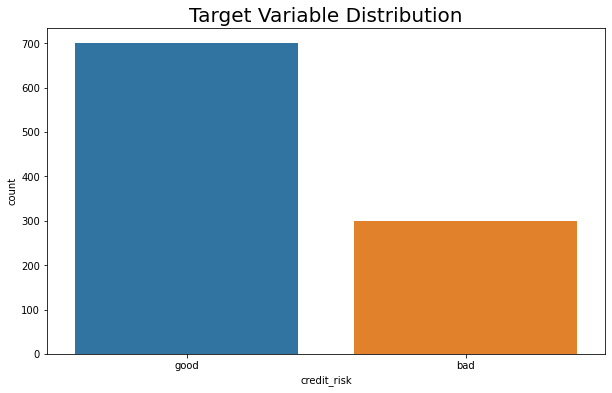

In [ ]:
# check the diatribution of target variable
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x="credit_risk")
plt.title("Target Variable Distribution", fontsize=20)
plt.show()

Justifikasi:

Ada 700 contoh di mana pelamar diklasifikasikan baik dan 
Ada 300 contoh di mana pelamar diklasifikasikan buruk

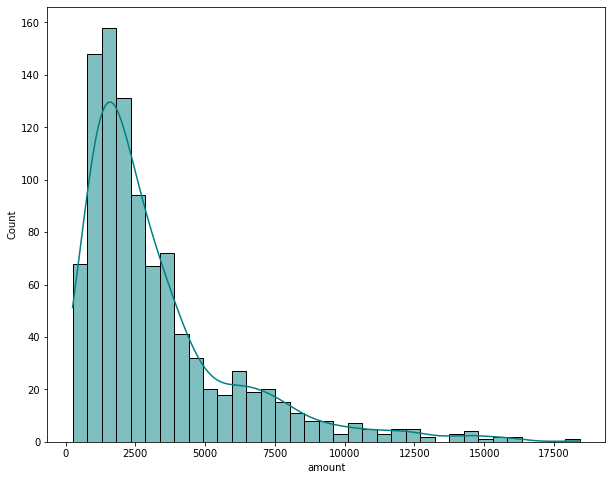

In [ ]:
# plot the credit_amount  column
plt.figure(figsize=(10,8))
sns.histplot(x='amount',color='teal',kde=True,data=df)

Justifikasi:Jumlah cicilan kebanyakan antara 1000 sampai 3000.

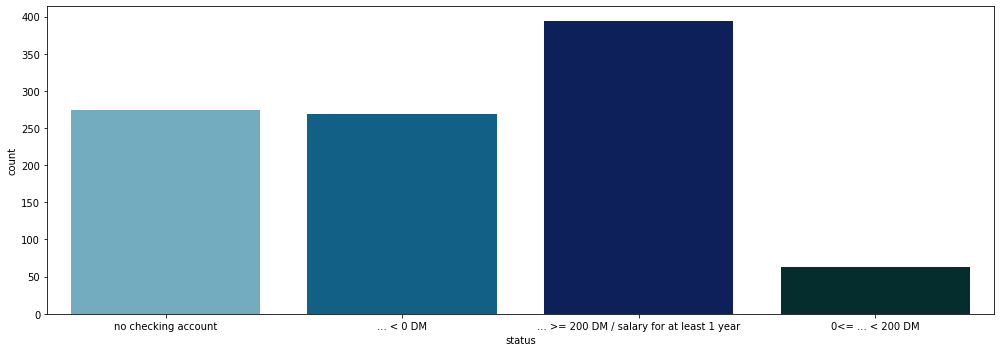

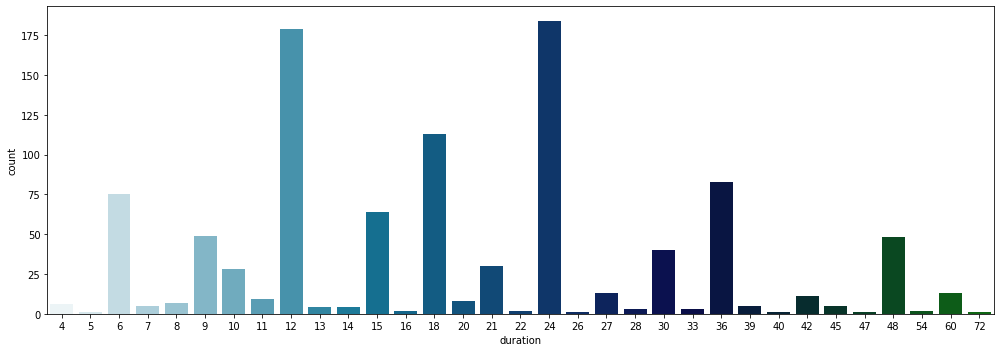

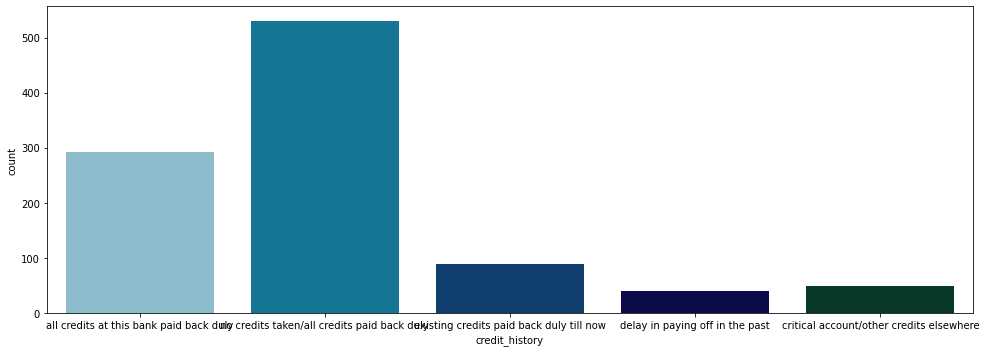

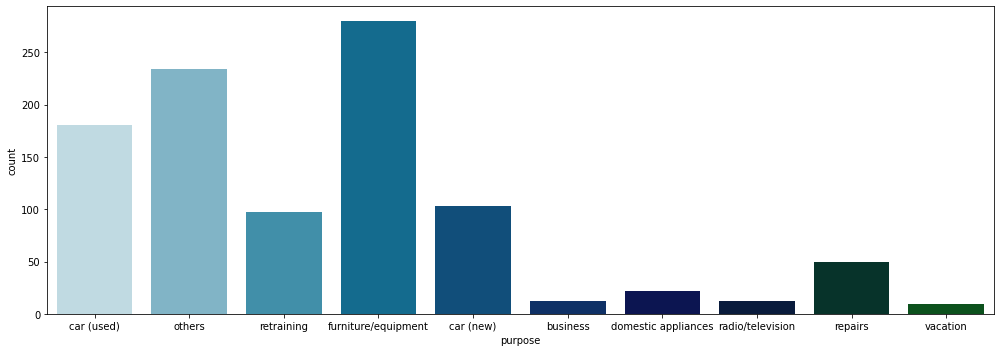

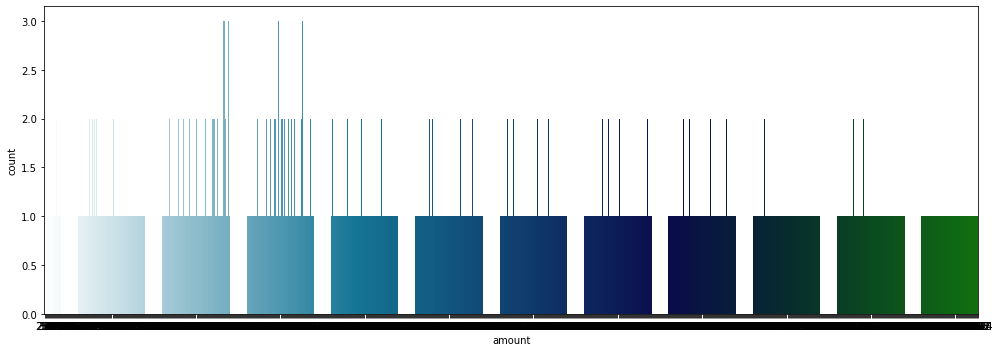

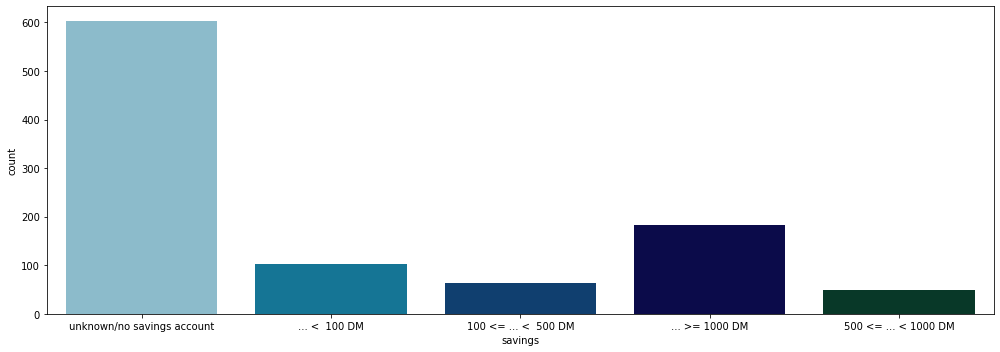

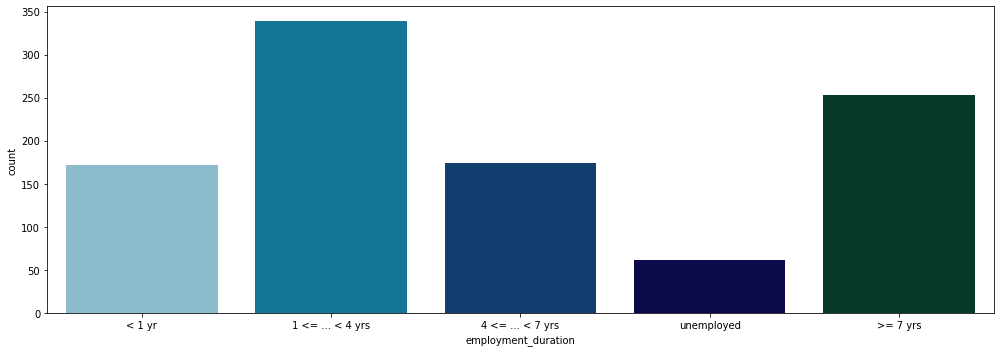

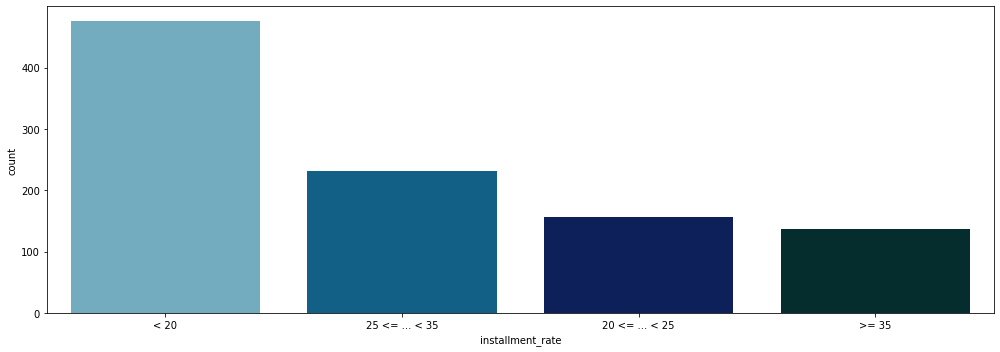

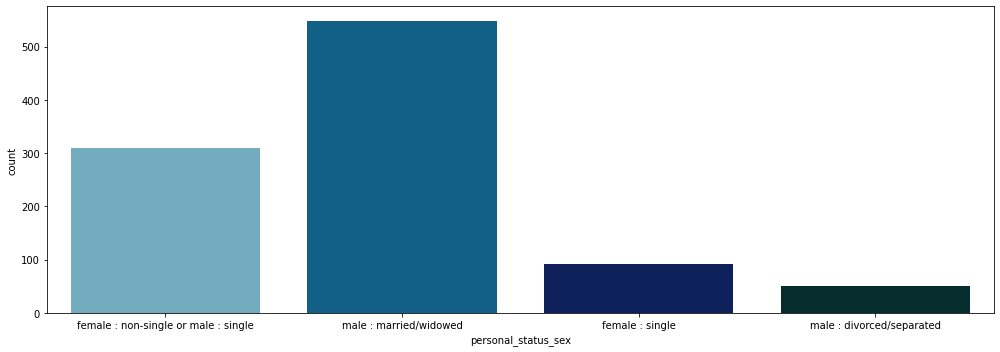

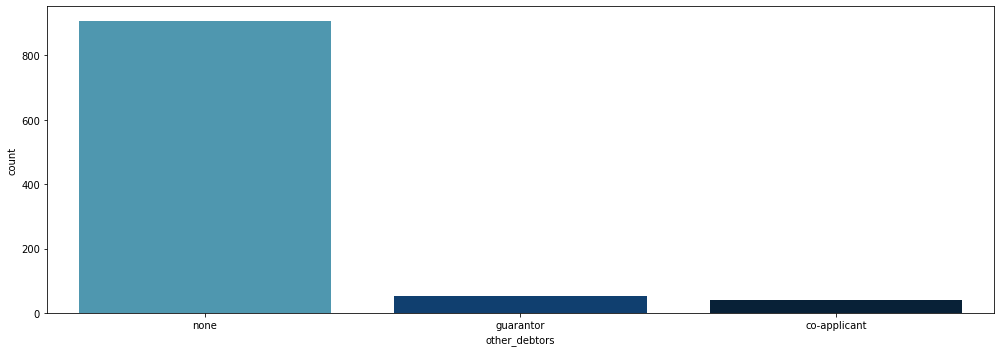

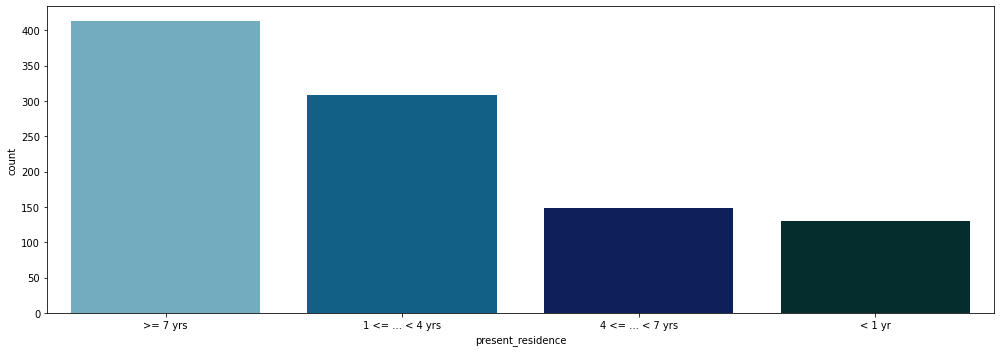

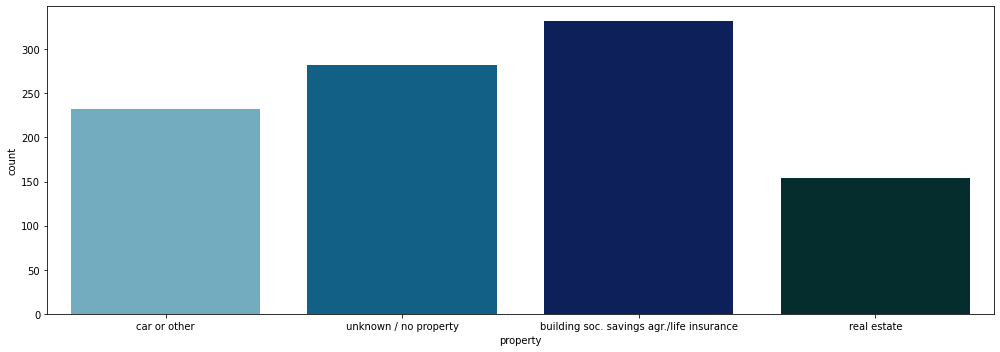

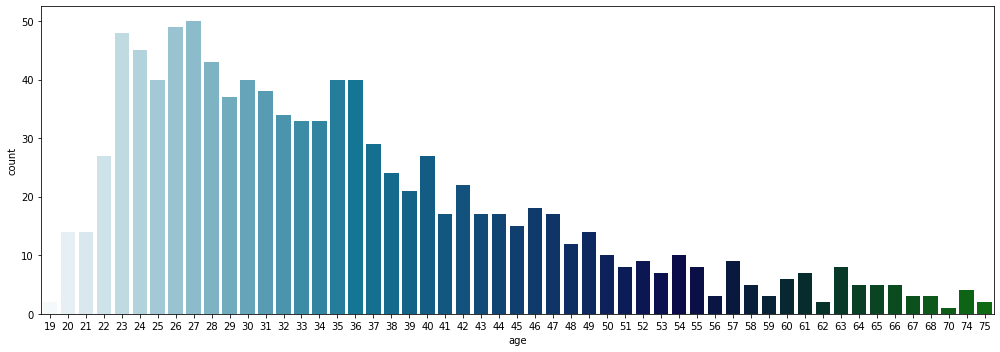

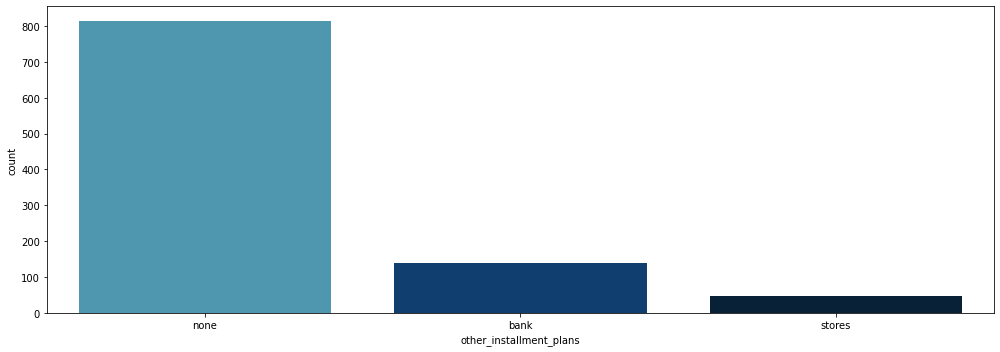

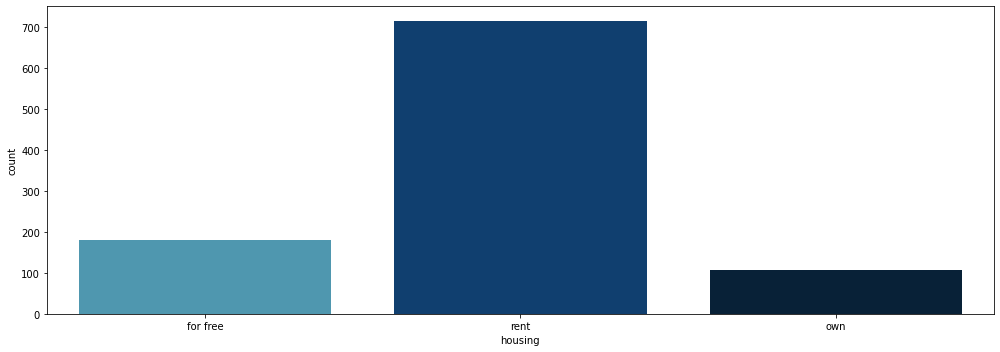

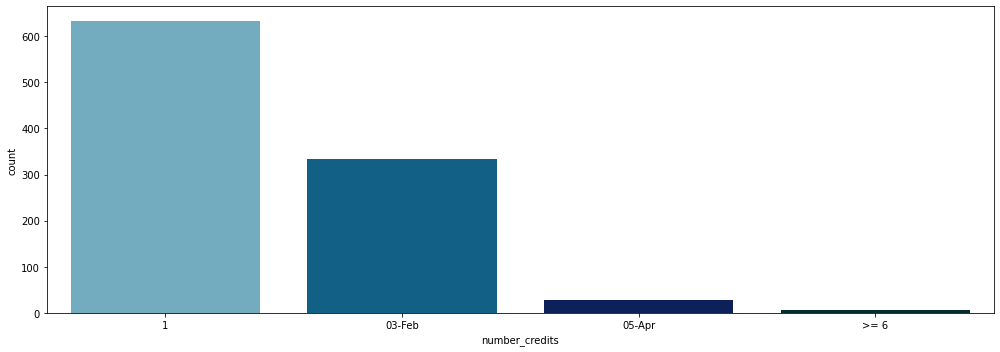

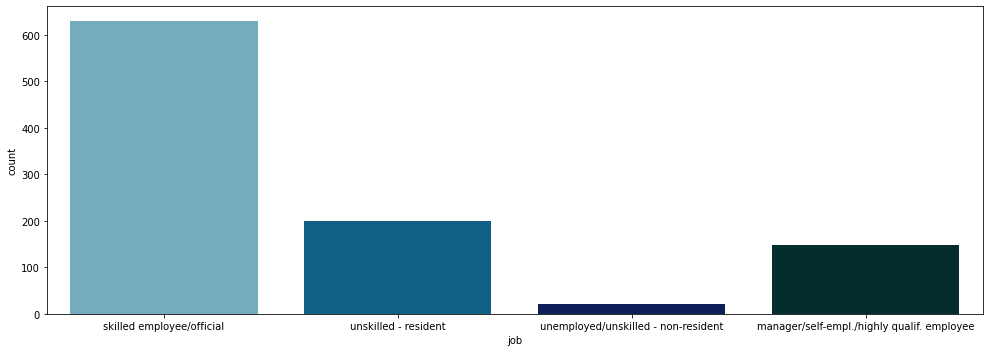

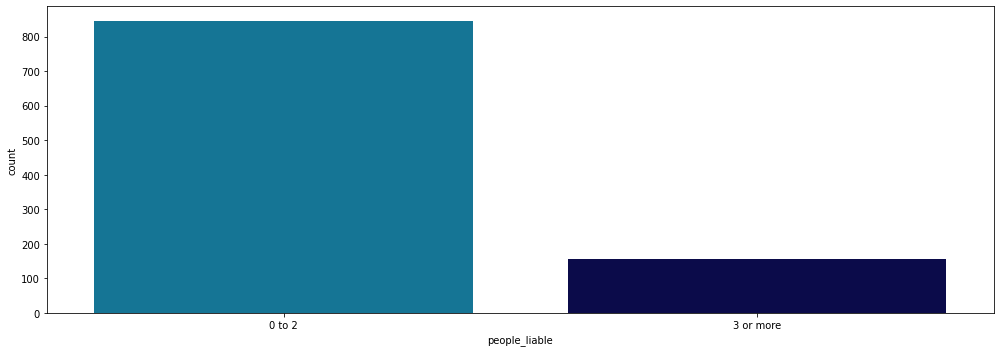

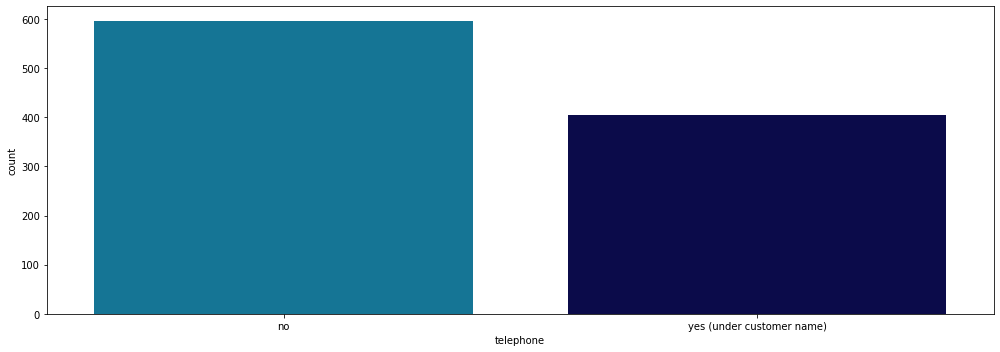

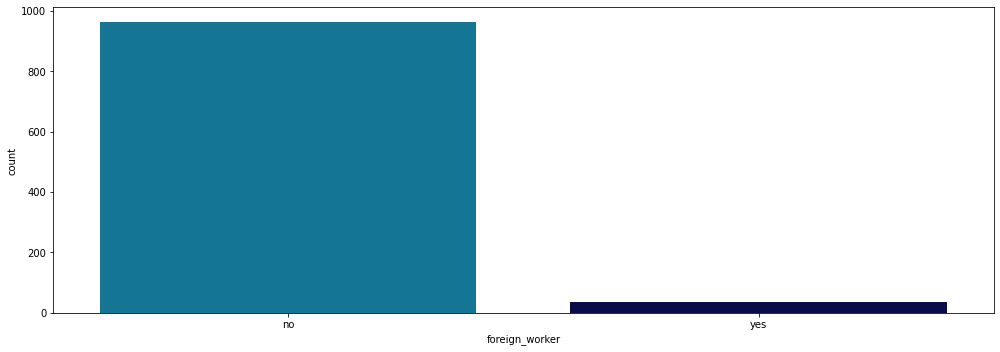

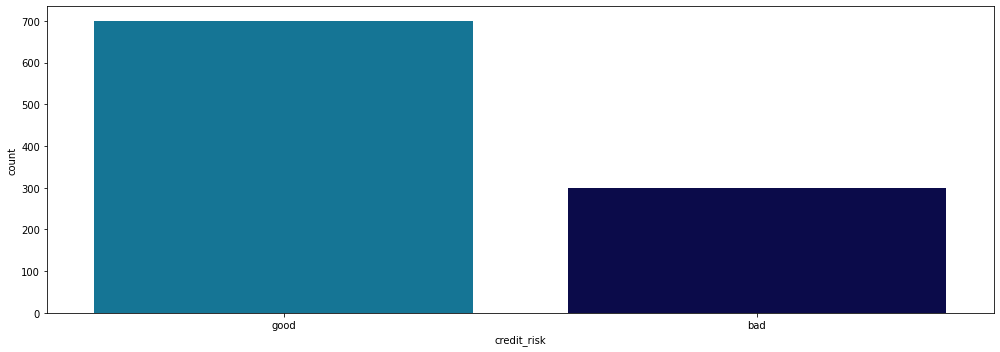

In [ ]:
# plot  all the column 
for i in df.columns:
    plt.figure(figsize=(14,5))
    sns.countplot(df[i],palette='ocean_r')
    plt.tight_layout()

Justifikasi:


*   Di kolom Status kita melihat bahwa jumlah yang tidak diketahui lebih banyak dan saldo akun pelanggan > 200 DM lebih sedikit
*   Pada kolom durasi pinjaman kita melihat bahwa durasi pinjaman 12 dan 24 bulan yang diambil nasabah lebih banyak.
*   Pada kolom credit histoy kita melihat bahwa credit history yang baik lebih banyak yaitu credit payback duty yang ada sampai saat ini lebih banyak dibandingkan dengan yang lain jadi ini bagus untuk bank.
*   Pada kolom purpose, Furniture/Appliances lebih banyak.
*   Pada kolom Savings Saldo rekening tabungan kisaran normal adalah <100 DM
*   Pada kolom employment_duration orang mengambil pinjaman lebih banyak pada saat 1-4 tahun berkerja  yang artinya pemula boleh mengambil pinjaman untuk mobil atau rumah.
*   Dalam kolom installment_rate Tingkat cicilan kurang dari 20% diambil lebih banyak oleh pelanggan dibanding yang lain.
*  In present_residual_since column More than 7 year residual customer more
*   Orang di kelompok USIA 23 hingga 35 pelanggan merupakan kelompok umur yang mengambil lebih banyak pinjaman
*   di Kolom Status percintaan wanita dengan status menikah merupakan kelompok terbanyak 
*   Pada kolom other_installment_plans disebutkan bahwa Kebanyakan nasabah mengambil 1 pinjaman pada saat itu, beberapa nasabah mengambil lebih dari 1 pinjaman.
*   Pada kolom housing 70% nasabah memiliki rumah sendiri.
*   Pada kolom number_credits tertulis bahwa 1 cicilan yang ada lebih banyak.
*   Pada kolom pekerjaan, pekerjaan skilled employee / official mengambil lebih banyak pinjaman mungkin karena mendapatkan penghasilan bulanan secara teratur sehingga mampu membayar cicilan pinjaman dengan mudah.
*   Pada kolom people_liable  3 orang atau lebih secara finansial bergantung pada jumlah debitur lebih banyak. Mungkin mereka terlambat membayar cicilan.
*   Pada kolom telephone 60% pelanggan belum memiliki telepon karena ini data tahun 1790-an jadi mungkin orang belum membawa telepon saat itu.
*   Pada kolom risiko kredit, Risiko Baik adalah 70% dan risiko buruk adalah 30%


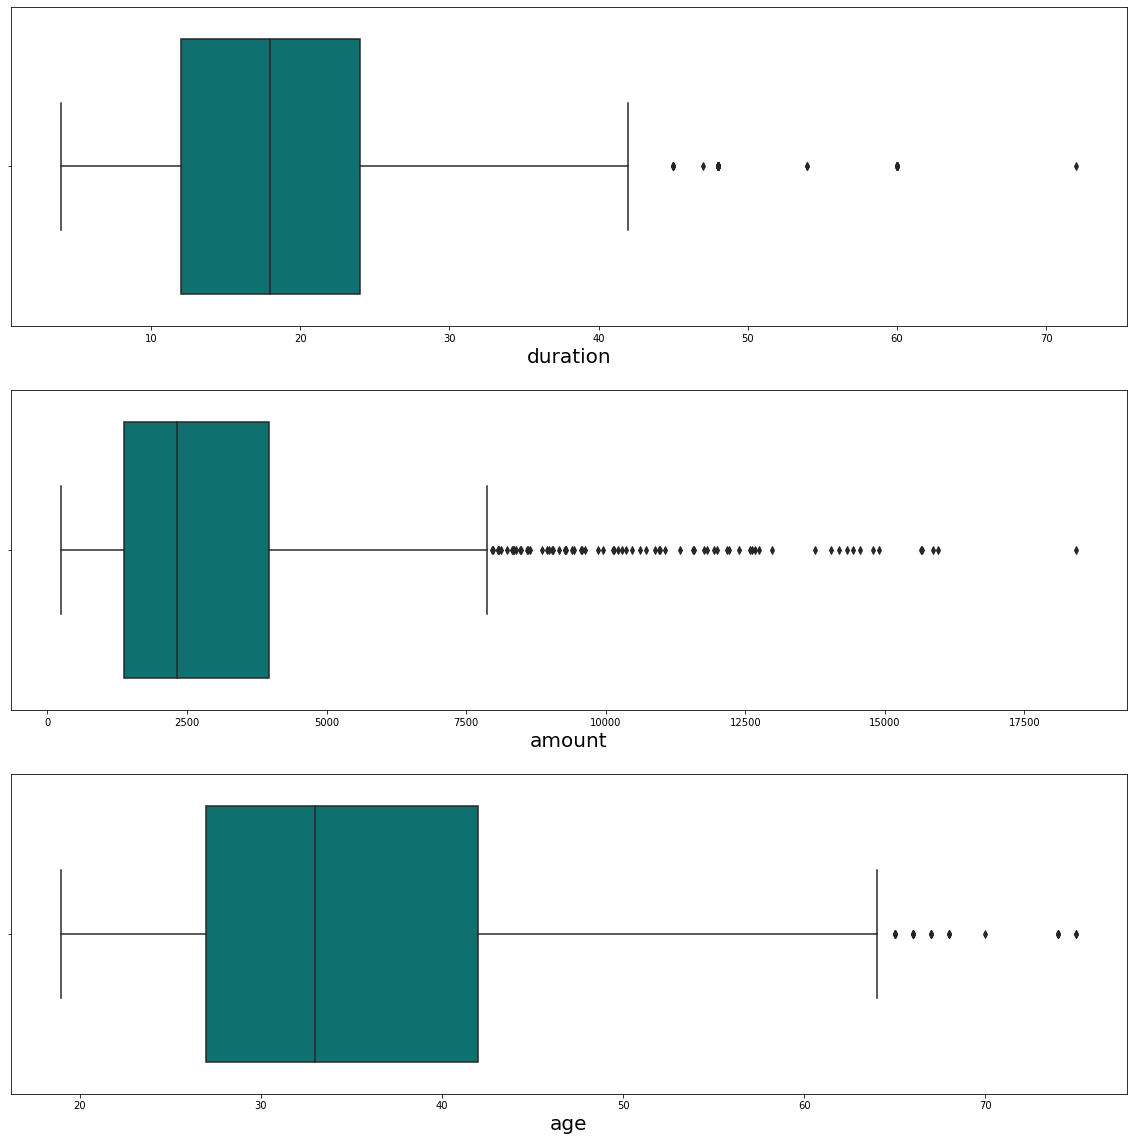

In [ ]:
# plot the boxplot
df_num = df.select_dtypes(include=[np.number])
fig, ax = plt.subplots(3,1,figsize=(20, 20))

for variable, subplot in zip(df_num.columns, ax.flatten()):
    z = sns.boxplot(x = df_num[variable], orient = "h",whis=1.5 , ax=subplot,color='teal') 
    z.set_xlabel(variable, fontsize = 20)  

**Bivariate Analysis**

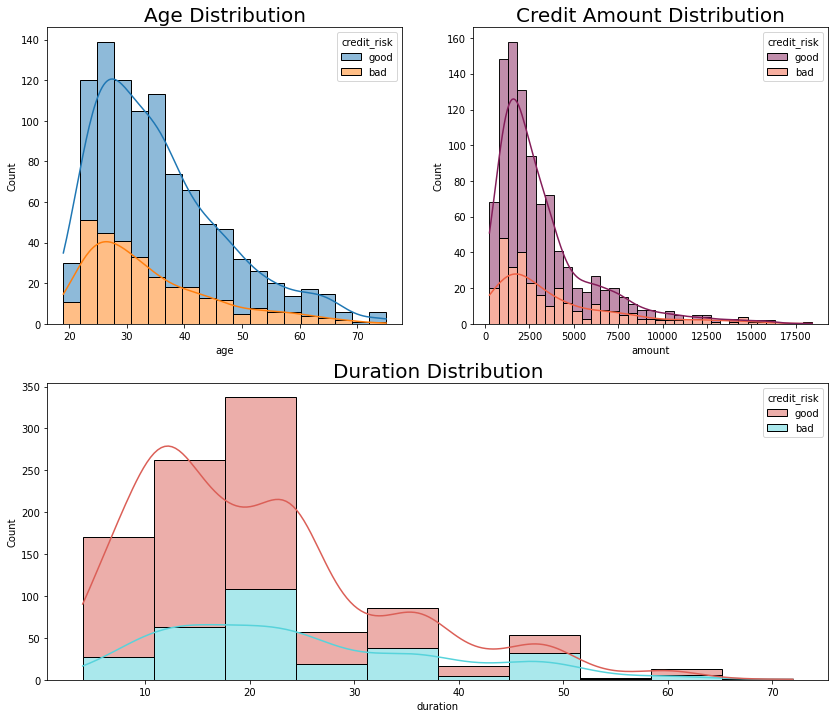

In [ ]:
# plot the histogram plot using age,credit_risk,credit_amount,loan_duretion_in_month
plt.figure(figsize=(14, 12))

plt.subplot(221)
ax1 = sns.histplot(data=df, x='age', hue='credit_risk', multiple='stack', palette='tab10', kde=True)
ax1.set_title("Age Distribution", fontsize=20)

plt.subplot(222)
ax2 = sns.histplot(data=df, x='amount', hue='credit_risk', multiple='stack', palette='rocket', kde=True)
ax2.set_title("Credit Amount Distribution", fontsize=20)

plt.subplot(212)
ax3 = sns.histplot(data=df, x='duration', hue='credit_risk', multiple='stack', palette='hls', kde=True, bins=10)
ax3.set_title("Duration Distribution", fontsize=20)

plt.show()

Justifikasi:

*   Semua grafik memiliki kemiringan positif yang menunjukkan bahwa rata-rata lebih besar dari median
*   Pelamar berusia antara 20 hingga 30 tahun lebih cenderung mengajukan pinjaman
*   Pelamar lebih kecil kemungkinannya untuk mengajukan pinjaman kredit yang tinggi
*   Lebih banyak pinjaman telah dilunasi sekitar 20 bulan setelah dikeluarkan
*   Bank lebih mungkin menerima pelamar antara usia 20 dan 30 dan meminta pinjaman antara 250 dan 2500 DM








Text(0.5, 1.0, 'Housing Distribution')

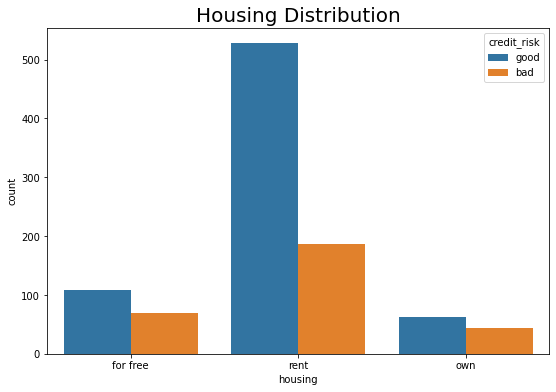

In [ ]:
#plot the countplot using housing_status and credit_risk
plt.figure(figsize=(9, 6))
sns.countplot(data=df, x='housing', hue='credit_risk')
plt.title("Housing Distribution", fontsize=20)

Justifikasi:


*   Kebanyakan pelamar menyewa rumah
*   Lebih dari separuh pelamar yang memiliki rumah tergolong baik



In [ ]:
# Bivariate Analysis
def visualize_distribution(attr):
    good_risk_df = df[df["credit_risk"]=="good"]
    bad_risk_df = df[df["credit_risk"]=="bad"]
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
    attr_good_risk_df = good_risk_df[[attr, 'credit_risk']].groupby(attr).count()
    attr_bad_risk_df = bad_risk_df[[attr, 'credit_risk']].groupby(attr).count()
    ax[0].barh( attr_good_risk_df['credit_risk'].index.tolist(), attr_good_risk_df['credit_risk'].tolist(), align='center', color="#5975A4")
    ax[1].barh( attr_bad_risk_df['credit_risk'].index.tolist(), attr_bad_risk_df['credit_risk'].tolist(), align='center', color="#B55D60")
    ax[0].set_title('Good Risk')
    ax[1].set_title('Bad Risk')
    ax[0].invert_xaxis()
    ax[1].yaxis.tick_right()
    num_para_change=["Present residence since","Number of existing credits at this bank","Installment rate in percentage of disposable income","Number of people being liable to provide maintenance for"]
    if attr in num_para_change:
        for i, v in enumerate(attr_good_risk_df['credit_risk'].tolist()):
            ax[0].text(v+15, i+1, str(v), color='black')
        for i, v in enumerate(attr_bad_risk_df['credit_risk'].tolist()):
            ax[1].text(v+2, i+1, str(v), color='black')
    else:
        for i, v in enumerate(attr_good_risk_df['credit_risk'].tolist()):
            ax[0].text(v+25, i + .05, str(v), color='black')
        for i, v in enumerate(attr_bad_risk_df['credit_risk'].tolist()):
            ax[1].text(v+1, i + .05, str(v), color='black')
    plt.suptitle(attr)
    plt.tight_layout()
    plt.show()

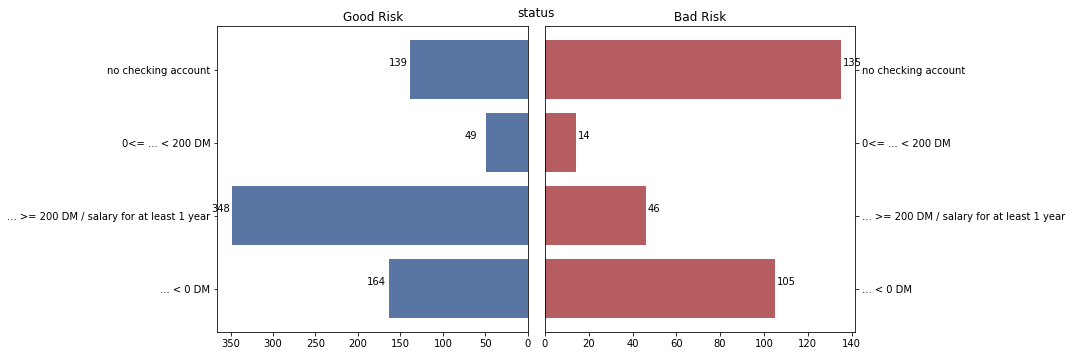

In [ ]:
visualize_distribution("status")

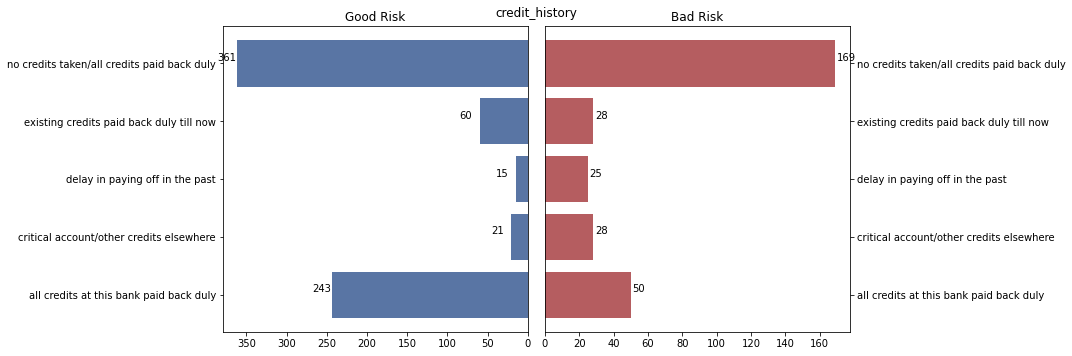

In [ ]:
visualize_distribution("credit_history")

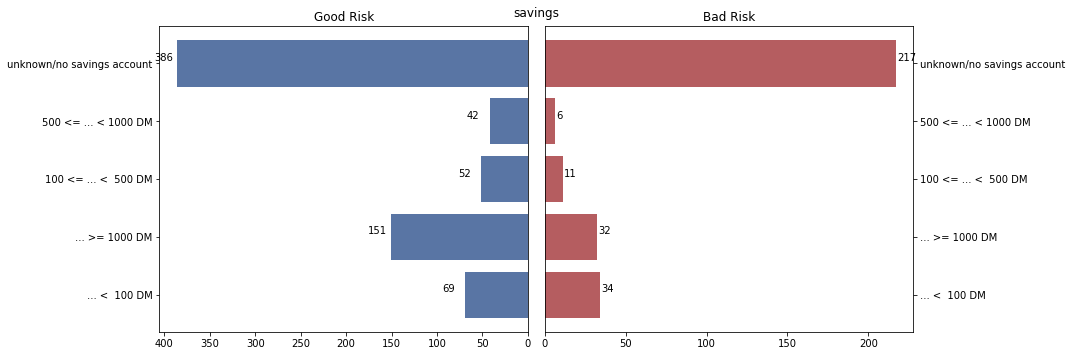

In [ ]:
visualize_distribution("savings")

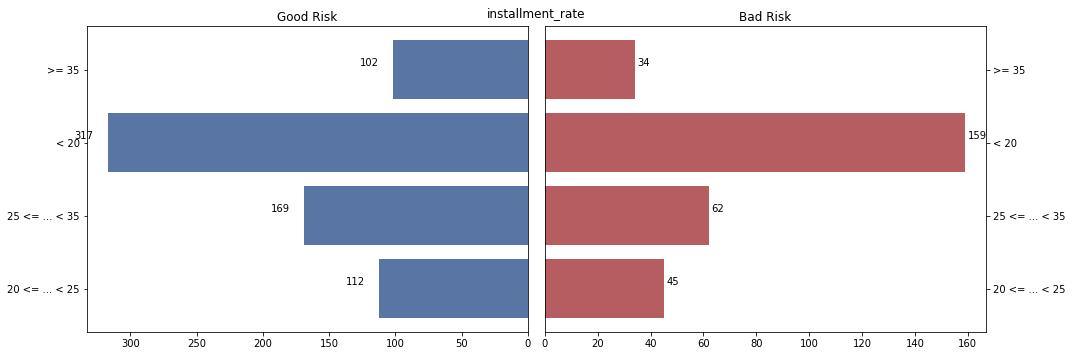

In [ ]:
visualize_distribution("installment_rate")

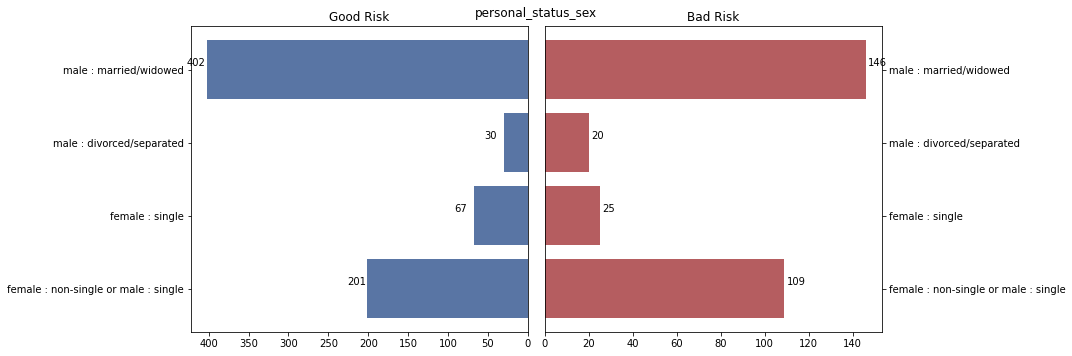

In [ ]:
visualize_distribution("personal_status_sex")

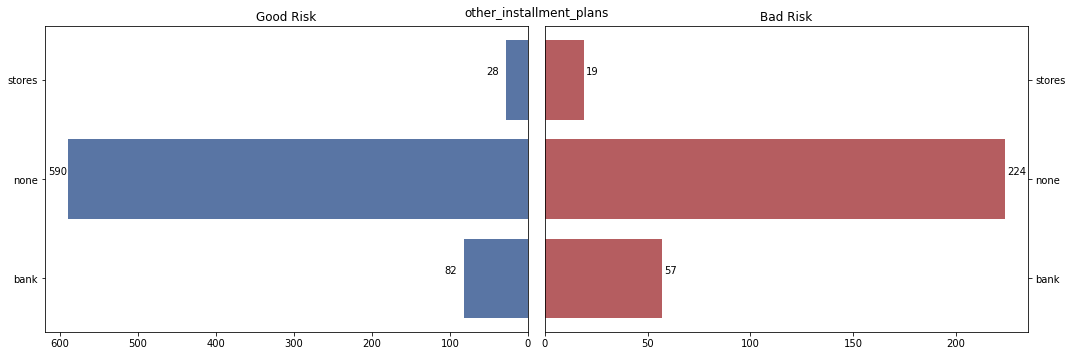

In [ ]:
visualize_distribution("other_installment_plans")

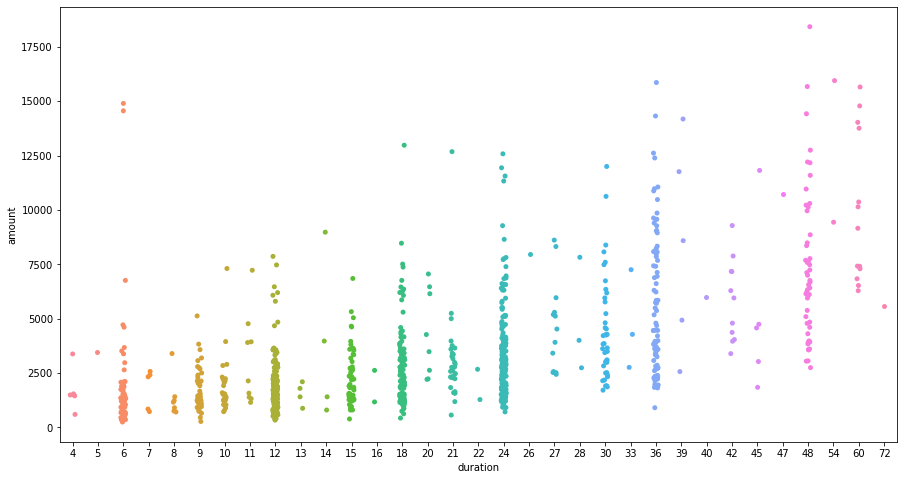

In [ ]:

plt.figure(figsize=(15,8))
sns.stripplot(x='duration',y='amount',data=df)

Justifikasi:
Kami melihat bahwa jumlah kredit meningkat ketika durasi pinjaman meningkat

**Multivariant Analysis**

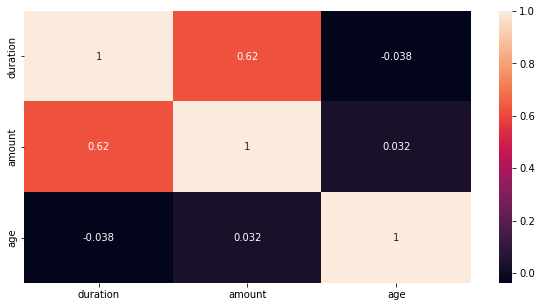

In [ ]:
#correlation plot for multicollinearity relation
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),annot=True)

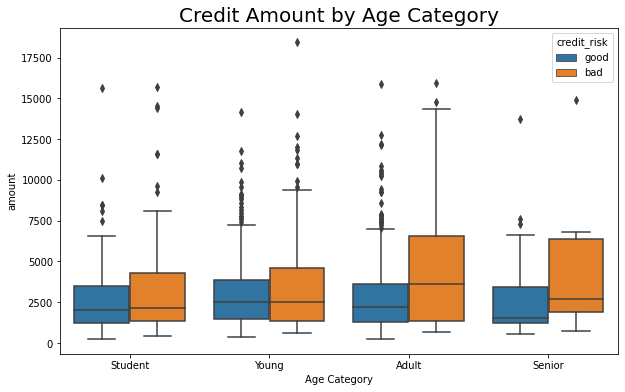

In [ ]:
# plot the age,credit_amount and credit_risk using boxplot
interval = (18, 25, 35, 60, 120)

cats = ['Student', 'Young', 'Adult', 'Senior']
df["Age Category"] = pd.cut(df.age, interval, labels=cats)

plt.figure(figsize=(10, 6))
plt.title("Credit Amount by Age Category", fontsize=20)
sns.boxplot(data=df, x='Age Category', y='amount', hue='credit_risk')
plt.show()

**Justifikasi**:


*   Lebih dari 50% pelamar dengan jumlah kredit di bawah 5.000 DM tergolong baik
*   Adult dengan kredit pinjaman lebih besar dari 5.000 DM lebih cenderung diklasifikasikan sebagai buruk
*   Student dan young kemungkinan besar akan mengajukan pinjaman dengan jumlah kredit kurang dari 5.000 DM





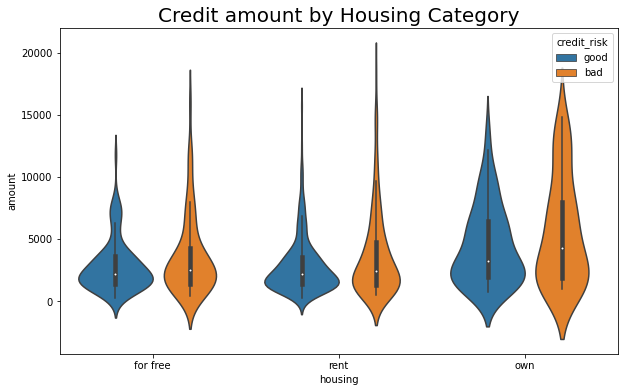

In [ ]:
#plot the violine plot
plt.figure(figsize=(10, 6))
sns.violinplot(data=df, x='housing', y='amount', hue='credit_risk')
plt.title("Credit amount by Housing Category", fontsize=20)
plt.show()

Bisa kita lihat dari Kurva density dari violin plot menunjukkan bahwa terdapat frekuensi pelamar yang lebih tinggi dengan jumlah kredit di bawah 5.000 DM

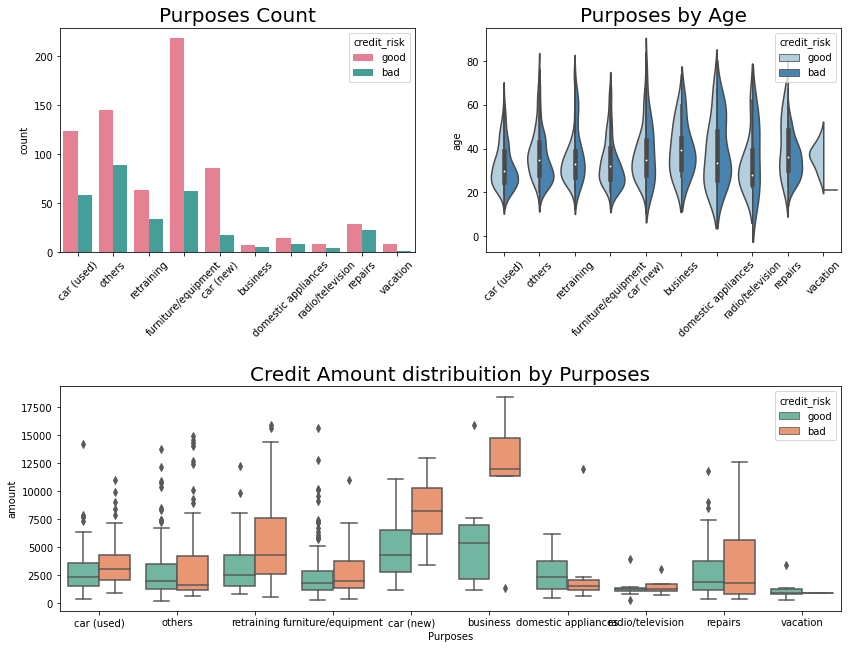

In [ ]:
#plot the count,box and violine plot

plt.figure(figsize = (14,12))

plt.subplot(221)
ax1 = sns.countplot(data=df, x="purpose", palette="husl", hue = "credit_risk")
ax1.set_xticklabels(ax1.get_xticklabels(),rotation=45)
ax1.set_xlabel("")
ax1.set_title("Purposes Count", fontsize=20)

plt.subplot(222)
ax2 = sns.violinplot(data=df, x="purpose", y="age", palette="Blues", hue = "credit_risk",split=True)
ax2.set_xticklabels(ax2.get_xticklabels(),rotation=45)
ax2.set_xlabel("")
ax2.set_title("Purposes by Age", fontsize=20)

plt.subplot(212)
ax3 = sns.boxplot(data=df, x="purpose", y="amount", palette="Set2", hue = "credit_risk")
ax3.set_xlabel("Purposes")
ax3.set_title("Credit Amount distribuition by Purposes", fontsize=20)

plt.subplots_adjust(hspace = 0.6, top = 0.8)

plt.show()

**Justifikasi**

*   Sebagian besar pemohon mengajukan pinjaman untuk membeli furniture/equipment, car(used), car(new), etc
*   Lebih dari separuh pemohon mengajukan pinjaman kurang dari 5.000 DM
*   Pelamar dengan pinjaman kredit tinggi lebih cenderung diklasifikasikan sebagai bad




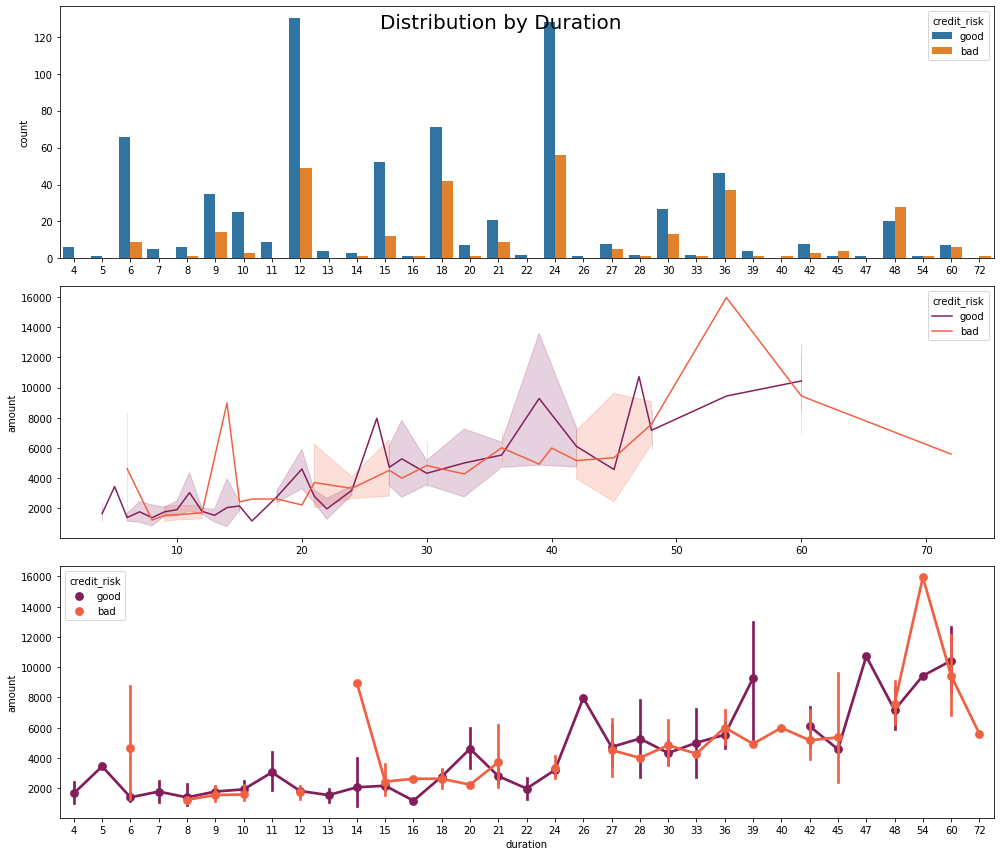

In [ ]:
#plot the count,line,point plot
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(14, 12))
fig.suptitle("Distribution by Duration", fontsize=20)
sns.countplot(data=df, x='duration', hue='credit_risk', palette='tab10', ax=ax1)
ax1.set_xlabel("")

sns.lineplot(data=df, x='duration', y='amount', hue='credit_risk', palette='rocket', ax=ax2)
ax2.set_xlabel("")

sns.pointplot(data=df, x='duration', y='amount', hue='credit_risk', palette='rocket', ax=ax3)
fig.tight_layout()
plt.show()

**Justifikasi:**

*   Sebagian besar pinjaman yang dikeluarkan memiliki durasi 12 dan 24 bulan
*   Sebagian besar pemohon yang melunasi pinjamannya dalam waktu 24 bulan tergolong baik
*   Sebagian besar pemohon dengan durasi pinjaman yang melebihi 24 bulan tergolong buruk





In [ ]:
#Menampilkan jumlah data null  setelah proses replace
nu=pd.isnull(df).sum()
nu

status                     0
duration                   0
credit_history             0
purpose                    0
amount                     0
savings                    0
employment_duration        0
installment_rate           0
personal_status_sex        0
other_debtors              0
present_residence          0
property                   0
age                        0
other_installment_plans    0
housing                    0
number_credits             0
job                        0
people_liable              0
telephone                  0
foreign_worker             0
credit_risk                0
Age Category               0
dtype: int64

In [ ]:
df['status'] = LabelEncoder().fit_transform(df['status'])
df['credit_history'] = LabelEncoder().fit_transform(df['credit_history'])
df['purpose'] = LabelEncoder().fit_transform(df['purpose'])
df['employment_duration'] = LabelEncoder().fit_transform(df['employment_duration'])
df['installment_rate'] = LabelEncoder().fit_transform(df['installment_rate'])
df['personal_status_sex'] = LabelEncoder().fit_transform(df['personal_status_sex'])
df['other_debtors'] = LabelEncoder().fit_transform(df['other_debtors'])
df['present_residence'] = LabelEncoder().fit_transform(df['present_residence'])
df['property'] = LabelEncoder().fit_transform(df['property'])
df['housing'] = LabelEncoder().fit_transform(df['housing'])
df['other_installment_plans'] = LabelEncoder().fit_transform(df['other_installment_plans'])
df['number_credits'] = LabelEncoder().fit_transform(df['number_credits'])
df['job'] = LabelEncoder().fit_transform(df['job'])
df['people_liable'] = LabelEncoder().fit_transform(df['people_liable'])
df['telephone'] = LabelEncoder().fit_transform(df['telephone'])
df['foreign_worker'] = LabelEncoder().fit_transform(df['foreign_worker'])
df['credit_risk'] = LabelEncoder().fit_transform(df['credit_risk'])
df['savings'] = LabelEncoder().fit_transform(df['savings'])
# change value of data
# df.replace({"status":{"... < 0 DM":"A11","0<= ... < 200 DM":"A12","... >= 200 DM / salary for at least 1 year":"A13","no checking account":"A14"},
#                   "credit_history":{"no credits taken/all credits paid back duly":"A30","all credits at this bank paid back duly":"A31","existing credits paid back duly till now":"A32","delay in paying off in the past":"A33","critical account/other credits elsewhere":"A34"},
#                   "purpose":{"car (new)":"A40","car (used)":"A41","furniture/equipment":"A42","radio/television":"A43","domestic appliances":"A44","repairs":"A45","education":"A46","vacation":"A47","retraining":"A48","business":"A49","others":"A410 "},
#                   "savings":{"... <  100 DM":"A61","100 <= ... <  500 DM":"A62","500 <= ... < 1000 DM":"A63","... >= 1000 DM":"A64","unknown/no savings account":"A65"},
#                   "employment_duration":{"unemployed":"A71","< 1 yr":"A72","1 <= ... < 4 yrs":"A73","4 <= ... < 7 yrs":"A74",">= 7 yrs":"A75"},
#                   "installment_rate":{"< 20":"A81","20 <= ... < 25":"A82","25 <= ... < 35":"A83",">= 35":"A84"},
#                   "personal_status_sex":{"male : divorced/separated":"A91","female : non-single or male : single":"A92","male : single":"A93","male : married/widowed":"A94","female : single":"A95"},
#                   "other_debtors":{"none":"A101","co-applicant":"A102","guarantor":"A103"},
#                   "present_residence":{"< 1 yr":"A111","1 <= ... < 4 yrs":"A112","4 <= ... < 7 yrs":"A113",">= 7 yrs":"A114"},
#                   "property":{"real estate":"A121","building soc. savings agr./life insurance":"A122","car or other":"A123","unknown / no property":"A124"},
#                   "other_installment_plans":{"bank":"A141","stores":"A142","none":"A143"},
#                   "housing":{"rent":"A151","own":"A152","for free":"A153"},
#                   "number_credits":{"1":"A161","03-Feb":"A162","05-Apr":"A163",">= 6":"A164"},
#                   "job":{"unemployed/unskilled - non-resident":"A171","unskilled - resident":"A172","skilled employee/official":"A173","manager/self-empl./highly qualif. employee":"A174"},
#                   "people_liable":{"0 to 2":"A181","3 or more":"A182"},
#                   "telephone":{"no":"A191","yes (under customer name)":"A192"},
#                   "foreign_worker":{"yes":"A201","no":"A202"},       
#                   "credit_risk":{"good": 1,"bad":"2"},       
#                   },inplace=True)
df

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,present_residence,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk,Age Category
0,3,18,0,2,1049,4,2,2,0,2,3,1,21,1,0,2,1,0,0,0,1,Student
1,3,9,0,5,2799,4,0,1,3,2,0,3,36,1,0,0,1,1,0,0,1,Adult
2,0,12,4,8,841,0,1,1,0,2,3,3,23,1,0,2,3,0,0,0,1,Student
3,3,12,0,5,2122,4,0,0,3,2,0,3,39,1,0,0,3,1,0,1,1,Adult
4,3,12,0,5,2171,4,0,2,3,2,3,1,38,0,2,0,3,0,0,1,1,Adult
5,3,10,0,5,2241,4,2,3,3,2,1,3,48,1,0,0,3,1,0,1,1,Adult
6,3,8,0,5,3398,4,1,3,3,2,3,3,39,1,2,0,3,0,0,1,1,Adult
7,3,6,0,5,1361,4,2,1,3,2,3,3,40,1,2,2,3,1,0,1,1,Adult
8,1,18,0,4,1098,4,4,2,0,2,3,0,65,1,2,0,2,0,0,0,1,Senior
9,0,24,4,4,3758,2,4,3,0,2,3,2,23,1,0,2,2,0,0,0,1,Student


In [ ]:
# # --1--
# d = {'A11': 1, 'A12': 2,'A13': 3,'A14': 4}
# df['status'] = df['status'].map(d)
# # ---2---
# #--3--
# d = {'A30': 1, 'A31': 2,'A32': 3,'A33': 4,'A34': 5}
# df['credit_history'] = df['credit_history'].map(d)
# #--4--
# d = {'A40': 1, 'A41': 2,'A42': 3,'A43': 4,'A44': 5, 'A45': 6,'A46': 7,'A47': 8,'A48': 9, 'A49':10,'A410': 11}
# df['purpose'] = df['purpose'].map(d)
# #--5--
# #--6--
# d = {'A61': 1, 'A62': 2,'A63': 3,'A64': 4,'A65': 5}
# df['savings'] = df['savings'].map(d)
# #--7--
# d = {'A71': 1, 'A72': 2,'A73': 3,'A74': 4,'A75': 5}
# df['employment_duration'] = df['employment_duration'].map(d)
# #--8--
# d = {'A81': 1, 'A82': 2,'A83': 3,'A84': 4}
# df['installment_rate'] = df['installment_rate'].map(d)
# #--9--
# d = {'A91': 1, 'A92': 2,'A93': 3,'A94': 4,'A95': 5}
# df['personal_status_sex'] = df['personal_status_sex'].map(d)
# #--10--
# d = {'A101': 1, 'A102': 2,'A103': 3}
# df['other_debtors'] = df['other_debtors'].map(d)
# #--11--
# d = {'A111': 1, 'A112': 2,'A113': 3,'A114':4}
# df['present_residence'] = df['present_residence'].map(d)
# #--12--
# d = {'A121': 1, 'A122': 2,'A123': 3,'A124': 4}
# df['property'] = df['property'].map(d)
# #--13--
# #--14--
# d = {'A141': 1, 'A142': 2,'A143': 3}
# df['other_installment_plans'] = df['other_installment_plans'].map(d)
# #--15--
# d = {'A151': 1, 'A152': 2,'A153': 3}
# df['housing'] = df['housing'].map(d)
# #--16--
# d = {'A161': 1, 'A162': 2,'A163': 3}
# df['number_credits'] = df['number_credits'].map(d)
# #--17--
# d = {'A171': 1, 'A172': 2,'A173': 3,'A174': 4}
# df['job'] = df['job'].map(d)
# #--18--
# d = {'A181': 1, 'A182': 2,'A183': 3,'A184': 4}
# df['people_liable'] = df['people_liable'].map(d)
# #--19--
# d = {'A191': 1, 'A192': 2}
# df['telephone'] = df['telephone'].map(d)
# #--20--
# d = {'A201': 1, 'A202': 0}
# df['foreign_worker'] = df['foreign_worker'].map(d)
# #--21--
# d = {1: 1, 2: 2}
# df['credit_risk'] = df['credit_risk'].map(d)
# df.head()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   status                   1000 non-null   int64   
 1   duration                 1000 non-null   int64   
 2   credit_history           1000 non-null   int64   
 3   purpose                  1000 non-null   int64   
 4   amount                   1000 non-null   int64   
 5   savings                  1000 non-null   int64   
 6   employment_duration      1000 non-null   int64   
 7   installment_rate         1000 non-null   int64   
 8   personal_status_sex      1000 non-null   int64   
 9   other_debtors            1000 non-null   int64   
 10  present_residence        1000 non-null   int64   
 11  property                 1000 non-null   int64   
 12  age                      1000 non-null   int64   
 13  other_installment_plans  1000 non-null   int64   
 14  housing  

In [ ]:
nu=pd.isnull(df).sum()
nu

status                     0
duration                   0
credit_history             0
purpose                    0
amount                     0
savings                    0
employment_duration        0
installment_rate           0
personal_status_sex        0
other_debtors              0
present_residence          0
property                   0
age                        0
other_installment_plans    0
housing                    0
number_credits             0
job                        0
people_liable              0
telephone                  0
foreign_worker             0
credit_risk                0
Age Category               0
dtype: int64

In [ ]:
# print(df)

In [ ]:
df['purpose'] = df['purpose'].apply(lambda x: int(round(x)))
df['number_credits'] = df['number_credits'].apply(lambda x: int(round(x)))
df['credit_risk'] = df['credit_risk'].apply(lambda x: int(round(x)))
df.head()

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,present_residence,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk,Age Category
0,3,18,0,2,1049,4,2,2,0,2,3,1,21,1,0,2,1,0,0,0,1,Student
1,3,9,0,5,2799,4,0,1,3,2,0,3,36,1,0,0,1,1,0,0,1,Adult
2,0,12,4,8,841,0,1,1,0,2,3,3,23,1,0,2,3,0,0,0,1,Student
3,3,12,0,5,2122,4,0,0,3,2,0,3,39,1,0,0,3,1,0,1,1,Adult
4,3,12,0,5,2171,4,0,2,3,2,3,1,38,0,2,0,3,0,0,1,1,Adult


In [ ]:
features = list(df.columns[:20])
features

['status',
 'duration',
 'credit_history',
 'purpose',
 'amount',
 'savings',
 'employment_duration',
 'installment_rate',
 'personal_status_sex',
 'other_debtors',
 'present_residence',
 'property',
 'age',
 'other_installment_plans',
 'housing',
 'number_credits',
 'job',
 'people_liable',
 'telephone',
 'foreign_worker']

In [ ]:
y = df["credit_risk"]
X = df[features]
X_train,X_test,Y_train,Y_test = train_test_split(X,y,test_size=0.25)

In [ ]:
rf_clf = RandomForestClassifier(random_state=42)

In [ ]:
bag_clf = BaggingClassifier(base_estimator=rf_clf, n_estimators=100)

In [ ]:
bag_clf.fit(X_train, Y_train)

BaggingClassifier(base_estimator=RandomForestClassifier(random_state=42),
                  n_estimators=100)

In [ ]:
("Accuracy: ", bag_clf.score(X_test, Y_test)*100,"%")

('Accuracy: ', 78.4, '%')